In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Bibliothèque pour lire les fichiers PD
!pip install pymupdf

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.0/20.0 MB 38.5 MB/s eta 0:00:00


In [ ]:
# Lire le fichier texte brut
with open("/content/drive/MyDrive/pinocchio.txt", "r", encoding="utf-8") as f:
    raw = f.read()


In [ ]:
import re

# Nettoyage de base
raw = re.sub(r'Pinocchio…\s*\d+', '', raw)  # Supprime les titres avec numéros de page
raw = re.sub(r'\n+', '\n', raw).strip()     # Supprime les lignes vides multiples


# Analyse du texte "Pinocchio"

In [ ]:
# Importation de la bibliothèque NLTK (Natural Language Toolkit)
import nltk

# Téléchargement des données nécessaires pour le tokeniseur
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

Les 20 premiers tokens extraits du texte ['\ufeffThe', 'Adventures', 'of', 'Pinocchio', 'by', 'Carlo', 'Collodi', 'CHAPTER', '1', 'How', 'it', 'happened', 'that', 'Mastro', 'Cherry', ',', 'carpenter', ',', 'found', 'a']
gold pieces; Fire Eater; Talking Cricket; Azure Hair; A-B-C book; old
man; Mastro Antonio; cried Pinocchio; Little Man; oak tree; Red
Lobster; giant oak; Mastro Cherry; Lovely Maiden; good luck; return
home; said Pinocchio; run away; Terrible Shark; asked Pinocchio


<Axes: xlabel='Samples', ylabel='Cumulative Counts'>

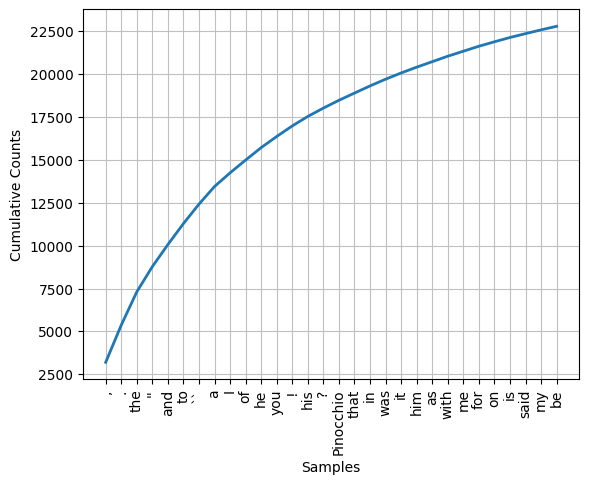

In [ ]:
# Tokenisation du texte brut (variable 'raw') en mots individuels (tokens)
tokens = nltk.word_tokenize(raw)

# Affichage des 20 premiers tokens pour vérifier le résultat
print("Les 20 premiers tokens extraits du texte", tokens[:20])

# Création d'un objet Text de NLTK à partir des tokens pour des analyses textuelles plus avancées
text = nltk.Text(tokens)

# Détection et affichage des collocations (expressions fréquentes de mots associés)
text.collocations()

# Importation de la classe FreqDist pour calculer la fréquence des mots
from nltk.probability import FreqDist

# Création de la distribution de fréquence des tokens
fdist = FreqDist(tokens)

# Affichage d’un graphique cumulatif des 30 mots les plus fréquents
fdist.plot(30, cumulative=True)

En observant le graphique, on peut voir les 30 mots les plus fréquents. Parmi eux, le mot "be" apparaît plus de 22 500 fois, ce qui en fait le mot le plus utilisé dans le texte.

In [ ]:
from nltk.tokenize import word_tokenize, sent_tokenize
from itertools import islice
# Tokenisation des phrases
sentences = sent_tokenize(raw, language="french")

# Liste des mots (tokenisation simple)
words = [word for sentence in sentences for word in sentence.split()]

# Création des n-grammes
unigrams = list(set(words))
bigrams = list(zip(words, words[1:]))
trigrams = list(zip(words, words[1:], words[2:]))

# Statistiques de base
print("Nombre de phrases :", len(sentences))
print("Nombre de mots :", len(words))
print("Nombre de mots uniques (unigrammes) :", len(unigrams))
print("Nombre de bigrammes :", len(bigrams))
print("Nombre de trigrammes :", len(trigrams))

# Affichage d'exemples
print("Exemples de phrases :")
for sent in sentences[:3]:
    print("-", sent)

print("Exemples de bigrammes :")
for pair in islice(bigrams, 5):
    print("-", pair)



Nombre de phrases : 3241
Nombre de mots : 39874
Nombre de mots uniques (unigrammes) : 6771
Nombre de bigrammes : 39873
Nombre de trigrammes : 39872
Exemples de phrases :
- ﻿The Adventures of Pinocchio
by Carlo Collodi
 
 
CHAPTER 1
How it happened that Mastro Cherry, carpenter,
found a piece of wood that wept and laughed like a child
Centuries ago there lived--
"A king!"
- my little readers will say immediately.
- No, children, you are mistaken.
Exemples de bigrammes :
- ('\ufeffThe', 'Adventures')
- ('Adventures', 'of')
- ('of', 'Pinocchio')
- ('Pinocchio', 'by')
- ('by', 'Carlo')


Le texte Pinocchio comprend 3 241 phrases avec près de 4 0000 mots, dont environ 6 770 mots uniques. Plus précisément, ce texte contient 6 770 mots uniques, 39 873 bigrammes et 39 872 trigrammes.


In [ ]:
import re
# Créer une liste de mots se terminant par "ion"
words_ion = [w for w in tokens if re.search('ion$', w)]

print(words_ion[:30])


['desperation', 'invitation', 'apparition', 'indigestion', 'desperation', 'destination', 'invitation', 'opinion', 'conclusion', 'desperation', 'celebration', 'hesitation', 'position', 'conversation', 'exception', 'proposition', 'inscription', 'perspiration', 'indigestion', 'profession', 'ammunition', 'compassion', 'permission', 'invitation', 'Vacation', 'vacation', 'determination', 'population', 'lion', 'investigation']


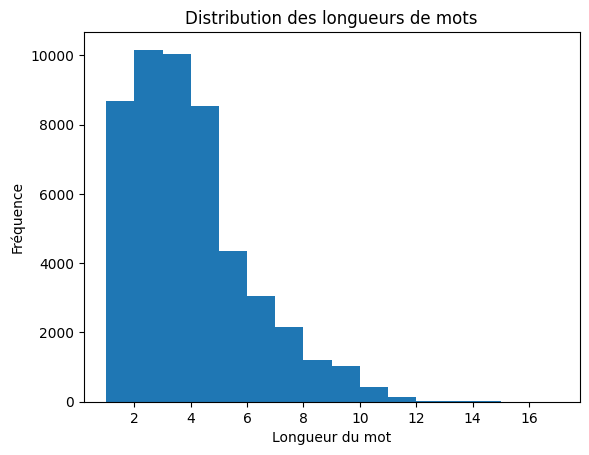

In [ ]:
import matplotlib.pyplot as plt
from collections import Counter
# Longueur de chaque mot dans tout le texte
longueurs_mots = [len(m) for m in tokens]
# Histogramme des longueurs de mots
Counter(longueurs_mots).most_common()
plt.hist(longueurs_mots, bins=range(1, max(longueurs_mots)+1))
plt.title("Distribution des longueurs de mots")
plt.xlabel("Longueur du mot")
plt.ylabel("Fréquence")
plt.show()

Le graphique montre que la majorité des mots du texte ont une longueur de 2 à 5 caractères. La fréquence diminue progressivement avec l’augmentation de la longueur des mots.

In [ ]:
# Calcul de la longueur moyenne des phrases
def simple_tokenize(text):
    return re.findall(r"\b\w+\b", text)
# Découpe brute en phrases
phrases_brutes = re.split(r'[.!?]', raw)
longueurs_phrases = [len(simple_tokenize(p)) for p in phrases_brutes if p.strip()]
longueur_moyenne_phrase = sum(longueurs_phrases) / len(longueurs_phrases)
longueur_moyenne_phrase


12.434448879336813

In [ ]:
# Filtrage des mots de contenu (en supprimant des mots vides simples)
stopwords = ['the', 'and', 'of', 'to', 'a', 'in', 'is', 'that', ',', '.', '!', '?']
content_words = [w for w in tokens if w.lower() not in stopwords]
print("Mots de contenu :", content_words[:20])


Mots de contenu : ['\ufeffThe', 'Adventures', 'Pinocchio', 'by', 'Carlo', 'Collodi', 'CHAPTER', '1', 'How', 'it', 'happened', 'Mastro', 'Cherry', 'carpenter', 'found', 'piece', 'wood', 'wept', 'laughed', 'like']


# Analyse morphologique : Stemming et Lemmatisation

Nombre de stems uniques : 2573
Nombre de lemmes uniques : 3559


<Axes: title={'center': 'Fréquence des lemmes les plus fréquents'}, xlabel='Samples', ylabel='Counts'>

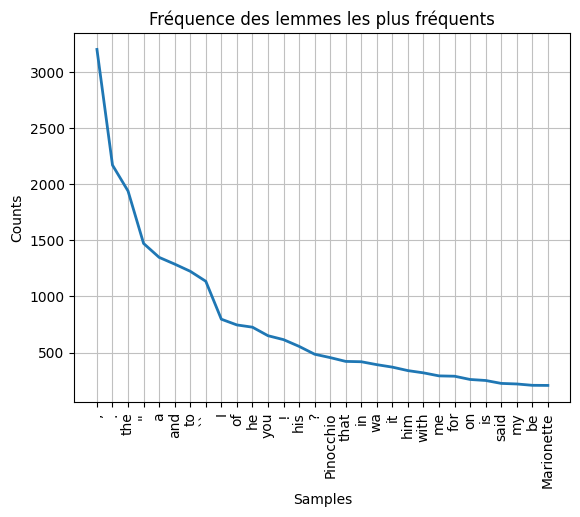

In [ ]:
from nltk.stem import PorterStemmer, WordNetLemmatizer

stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

# Appliquer stemming et lemmatisation
stems = [stemmer.stem(w) for w in tokens]
lemmes = [lemmatizer.lemmatize(w) for w in tokens]

# Statistiques
print("Nombre de stems uniques :", len(set(stems)))
print("Nombre de lemmes uniques :", len(set(lemmes)))

# Fréquence des lemmes
from nltk.probability import FreqDist
fdist_lem = FreqDist(lemmes)
fdist_lem.plot(30, title="Fréquence des lemmes les plus fréquents")

# Transformer

In [ ]:
#pip install transformers

In [ ]:
# Découper le texte en petits morceaux pour la traduction
def decouper_texte(text, longueur_max=400):
    phrases = text.split('.')
    morceaux = []
    courant = ''
    for phrase in phrases:
        if len(courant) + len(phrase) < longueur_max:
            courant += phrase + '.'
        else:
            morceaux.append(courant.strip())
            courant = phrase + '.'
    if courant:
        morceaux.append(courant.strip())
    return morceaux

morceaux = decouper_texte(raw)

In [ ]:
# 2. Charger le modèle de traduction anglais → français depuis Hugging Face
from transformers import MarianTokenizer, MarianMTModel

modele_nom = "Helsinki-NLP/opus-mt-en-fr"
tokenizer = MarianTokenizer.from_pretrained(modele_nom)
modele = MarianMTModel.from_pretrained(modele_nom)


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/42.0 [00:00<?, ?B/s]

source.spm:   0%|          | 0.00/778k [00:00<?, ?B/s]

target.spm:   0%|          | 0.00/802k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.34M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.42k [00:00<?, ?B/s]

/usr/local/lib/python3.11/dist-packages/transformers/models/marian/tokenization_marian.py:175: UserWarning: Recommended: pip install sacremoses.
  warnings.warn("Recommended: pip install sacremoses.")


pytorch_model.bin:   0%|          | 0.00/301M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/301M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/293 [00:00<?, ?B/s]

In [ ]:
# Tester la traduction sur une seule phrase
phrase_test = raw.split('.')[0].strip() + "."

entrees = tokenizer(phrase_test, return_tensors="pt", padding=True, truncation=True)
sortie = modele.generate(**entrees)
phrase_traduite = tokenizer.batch_decode(sortie, skip_special_tokens=True)[0]

print(" Phrase originale :\n", phrase_test)
print("\n Traduction en français :\n", phrase_traduite)



 Phrase originale :
 ﻿The Adventures of Pinocchio
by Carlo Collodi
 
 
CHAPTER 1
How it happened that Mastro Cherry, carpenter,
found a piece of wood that wept and laughed like a child
Centuries ago there lived--
"A king!" my little readers will say immediately.

 Traduction en français :
 Les aventures de Pinocchio par Carlo Collodi CHAPITRE 1 Comment s'est-il passé que Mastro Cherry, charpentier, a trouvé un morceau de bois qui pleurait et riait comme un enfant il y a des siècles -- "Un roi!" mes petits lecteurs diront immédiatement.


In [ ]:
# 3. Traduire chaque morceau
#traductions = []

#for morceau in morceaux:
    #entrees = tokenizer(morceau, return_tensors="pt", padding=True, truncation=True)
    #sortie = modele.generate(**entrees)
    #texte_fr = tokenizer.batch_decode(sortie, skip_special_tokens=True)[0]
    #traductions.append(texte_fr)

In [ ]:
# 4. Recomposer le texte traduit complet
#texte_traduit = "\n\n".join(traductions)

# 5. (Optionnel) Sauvegarder dans un fichier texte
#with open("/content/drive/MyDrive/pinocchio_traduit_fr.txt", "w", encoding="utf-8") as f:
    #f.write(texte_traduit)

#print("Traduction terminée avec succès !")

# Modèle TF-IDF

In [ ]:
# Préparation des données pour TF-IDF
documents = [raw]

from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
# Création du modèle TF-IDF (en utilisant les stop words en anglais de sklearn)
vectorizer = TfidfVectorizer(stop_words='english', max_features=20)  # limitation aux 20 mots ayant les scores TF-IDF les plus élevés
matrice_tfidf = vectorizer.fit_transform(documents)

# Extraction du vocabulaire et des scores TF-IDF associés
noms_des_mots = vectorizer.get_feature_names_out()
scores_tfidf = matrice_tfidf.toarray().flatten()

# Création d'un DataFrame avec le vocabulaire et les scores TF-IDF
df_tfidf = pd.DataFrame({
    'Vocabulaire': noms_des_mots,
    'TF-IDF': scores_tfidf
}).sort_values(by='TF-IDF', ascending=False)

# Affichage des résultats
print(df_tfidf)


   Vocabulaire    TF-IDF
15   pinocchio  0.669808
17        said  0.329054
14  marionette  0.304192
11      little  0.251544
8         good  0.182808
16        poor  0.178421
12          ll  0.174033
10        like  0.156484
6       father  0.150634
5        fairy  0.137472
19        want  0.125772
2         come  0.121384
3        cried  0.115535
0     answered  0.114072
13        long  0.111147
7     geppetto  0.109685
9         know  0.106760
4          did  0.106760
1        asked  0.103835
18        time  0.103835


L'analyse du texte « Pinocchio » par la méthode TF-IDF souligne l'importance centrale du personnage principal, Pinocchio. Les mots « marionette » (pantin), « fairy » (fée), « father » (père) et « geppetto » révèlent les personnages clés influençant son parcours. La fréquence élevée des termes de dialogue (« said », « asked », « answered ») et des expressions émotionnelles (« poor », « little ») montre un récit riche en interactions et en émotions.

# Latent Dirichlet Allocation (LDA)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# 1. Nettoyage léger du texte brut
def nettoyer_texte(texte):
    texte = texte.lower()
    texte = re.sub(r'\d+', '', texte)
    texte = re.sub(r'[^\w\s]', '', texte)
    texte = re.sub(r'\s+', ' ', texte)
    return texte

texte_nettoye = nettoyer_texte(raw)

# 2. Découpage du texte en paragraphes ou phrases
documents = texte_nettoye.split('. ')

# Transformer les documents en une matrice document-terme
vectorizer = CountVectorizer(stop_words='english', token_pattern=r'\b[a-zA-Z]{4,}\b')
matrice_doc_terme = vectorizer.fit_transform(documents)
# Création du modèle LDA pour identifier 3 sujets latents (n_topics=3)
nombre_de_sujets = 3
modele_lda = LatentDirichletAllocation(n_components=nombre_de_sujets, random_state=42)
modele_lda.fit(matrice_doc_terme)

# Fonction d'affichage des résultats des sujets
def afficher_sujets(modele, noms_caracteristiques, nombre_mots):
    for index, sujet in enumerate(modele.components_):
        print(f"Sujet #{index + 1}:")
        indices_mots = sujet.argsort()[:-nombre_mots - 1:-1]
        mots_importants = [noms_caracteristiques[i] for i in indices_mots]
        poids_mots = sujet[indices_mots]
        print(" | ".join([f"{mot} ({poids:.2f})" for mot, poids in zip(mots_importants, poids_mots)]))
        print()

# Afficher les 5 mots les plus représentatifs pour chaque sujet
nombre_mots = 10
noms_caracteristiques = vectorizer.get_feature_names_out()
print("Les sujets latents extraits du texte « Pinocchio » :\n")
afficher_sujets(modele_lda, noms_caracteristiques, nombre_mots)

# Afficher la distribution des sujets dans chaque paragraphe (les 500 premiers seulement)
distribution_sujets_documents = modele_lda.transform(matrice_doc_terme)
for i, distribution in enumerate(distribution_sujets_documents[:500]):
    info_sujet = " | ".join([f"Sujet {j+1}: {prob:.2f}" for j, prob in enumerate(distribution)])
    print(f"Paragraphe {i+1}: {info_sujet}\n")


Les sujets latents extraits du texte « Pinocchio » :

Sujet #1:
accepted (0.33) | accepting (0.33) | youngest (0.33) | younger (0.33) | accident (0.33) | admitted (0.33) | adventures (0.33) | affectionately (0.33) | africa (0.33) | againlaughed (0.33)

Sujet #2:
pinocchio (429.33) | said (225.33) | marionette (199.33) | little (172.33) | poor (122.33) | like (106.33) | good (102.33) | father (97.33) | want (86.33) | fairy (83.33)

Sujet #3:
accepted (0.33) | accepting (0.33) | youngest (0.33) | younger (0.33) | accident (0.33) | admitted (0.33) | adventures (0.33) | affectionately (0.33) | africa (0.33) | againlaughed (0.33)

Paragraphe 1: Sujet 1: 0.00 | Sujet 2: 1.00 | Sujet 3: 0.00



Parmi les trois sujets extraits du texte Pinocchio à l’aide du modèle LDA, le sujet n°2  se distingue comme le seul sujet véritablement pertinent et directement lié au contenu du récit. Les mots-clés de ce sujet incluent : "pinocchio", "said", "marionette", "little", "poor", "father", "fairy", "want", qui représentent les éléments essentiels du personnage principal, ses relations clés et son parcours émotionnel tout au long de l’histoire.

Plus précisément, le mot "pinocchio" confirme que le sujet est centré sur le protagoniste. Le mot "marionette" rappelle sa nature initiale de pantin, non encore humain. Les mots "said", "want", "father" et "fairy" indiquent un sujet focalisé sur les dialogues, les désirs de devenir un vrai garçon, la relation entre Pinocchio et son père – Geppetto, ainsi que le rôle de la fée – guide et soutien tout au long de son cheminement. Les termes comme "little" et "poor" décrivent sa fragilité, son innocence et les émotions liées à sa condition.

# Analyse de sentiments ciblée par personnage (phrase par phrase)

## Analyse de sentiment basée sur un lexique (TextBlob)

In [ ]:
from textblob import TextBlob

# Nettoyage du texte brut
def nettoyer_texte(texte):
    texte = texte.replace('\xa0', ' ')
    texte = re.sub(r'\s+', ' ', texte)
    return texte.strip()

texte_propre = nettoyer_texte(raw)

# Découpage du texte en phrases
phrases = sent_tokenize(texte_propre)

# Liste des personnages à suivre
personnages = ['pinocchio', 'geppetto', 'fairy', 'cricket', 'fox', 'cat']

# Analyse de chaque phrase
resultats = []
for phrase in phrases:
    phrase_minuscule = phrase.lower()
    personnages_trouves = [p for p in personnages if p in phrase_minuscule]

    if personnages_trouves:  # uniquement si un personnage est mentionné
        polarite = TextBlob(phrase).sentiment.polarity
        sentiment = "Positif" if polarite > 0.1 else "Négatif" if polarite < -0.1 else "Neutre"

        for personnage in personnages_trouves:
            resultats.append({
                "Phrase": phrase,
                "Personnage": personnage.capitalize(),
                "Sentiment": sentiment,
                "Score": round(polarite, 3)
            })

# Création du tableau de résultats
df_textblob = pd.DataFrame(resultats)

# Affichage des premières lignes
print(df_textblob.head())

# Exporter les résultats vers un fichier CSV
df_textblob.to_csv("sentiments_par_personnage.csv", index=False)


                                              Phrase Personnage Sentiment  \
0  ﻿The Adventures of Pinocchio by Carlo Collodi ...  Pinocchio   Positif   
1  CHAPTER 2 Mastro Cherry gives the piece of woo...   Geppetto    Neutre   
2  His name was Geppetto, but to the boys of the ...   Geppetto    Neutre   
3                    Geppetto had a very bad temper.   Geppetto   Négatif   
4         "Good day, Mastro Antonio," said Geppetto.   Geppetto   Positif   

   Score  
0  0.875  
1  0.050  
2  0.000  
3 -0.910  
4  0.700  


In [ ]:
from collections import Counter

# Créer une liste de tuples (Personnage, Sentiment)
combinaisons = list(zip(df_textblob["Personnage"], df_textblob["Sentiment"]))

# Compter les occurrences
compte = Counter(combinaisons)

# Affichage des résultats
print("Répartition des sentiments par personnage :")
for (personnage, sentiment), nb in compte.items():
    print(f"{personnage} - {sentiment} : {nb} phrases")


Répartition des sentiments par personnage :
Pinocchio - Positif : 134 phrases
Geppetto - Neutre : 34 phrases
Geppetto - Négatif : 19 phrases
Geppetto - Positif : 21 phrases
Pinocchio - Neutre : 219 phrases
Pinocchio - Négatif : 86 phrases
Cat - Négatif : 11 phrases
Cat - Neutre : 33 phrases
Cricket - Négatif : 10 phrases
Cricket - Neutre : 11 phrases
Cricket - Positif : 13 phrases
Fox - Neutre : 24 phrases
Fox - Négatif : 9 phrases
Fox - Positif : 10 phrases
Cat - Positif : 12 phrases
Fairy - Positif : 36 phrases
Fairy - Neutre : 44 phrases
Fairy - Négatif : 9 phrases


Pinocchio est le personnage le plus présent dans le récit, traversant
une large gamme d’émotions.

Geppetto et la Fée incarnent la figure de l’adulte aimant, protecteur, mais aussi parfois sévère.

Le Renard et le Chat sont majoritairement associés à des sentiments neutres ou négatifs, soulignant leur rôle de personnages trompeurs et manipulateurs.

La Fée représente une lumière positive constante tout au long de l’histoire, guidant Pinocchio dans son cheminement.

## Naive Bayes

In [ ]:
from nltk import word_tokenize
from nltk.classify import NaiveBayesClassifier


# Dữ liệu huấn luyện đơn giản (bạn có thể mở rộng)
train_data = [
    ("I love this!", "Positif"),
    ("What a wonderful scene.", "Positif"),
    ("This is terrible.", "Négatif"),
    ("I hate that character.", "Négatif"),
    ("Nothing much happened.", "Neutre"),
    ("It was okay, not great.", "Neutre")
]

def extract_features(text):
    words = word_tokenize(text)
    return {f"contains({w.lower()})": True for w in words}

train_set = [(extract_features(text), label) for (text, label) in train_data]
nb_classifier = NaiveBayesClassifier.train(train_set)

In [ ]:
# Analyse avec Naive Bayes
resultats_nb = []
for phrase in phrases:
    phrase_minuscule = phrase.lower()
    personnages_trouves = [p for p in personnages if p in phrase_minuscule]

    if personnages_trouves:
        features = extract_features(phrase)
        sentiment_nb = nb_classifier.classify(features)

        for personnage in personnages_trouves:
            resultats_nb.append({
                "Phrase": phrase,
                "Personnage": personnage.capitalize(),
                "Sentiment_NaiveBayes": sentiment_nb
            })

# Créer DataFrame et sauvegarder
df_nb = pd.DataFrame(resultats_nb)
print(df_nb.head())
df_nb.to_csv("sentiments_naivebayes.csv", index=False)

                                              Phrase Personnage  \
0  ﻿The Adventures of Pinocchio by Carlo Collodi ...  Pinocchio   
1  CHAPTER 2 Mastro Cherry gives the piece of woo...   Geppetto   
2  His name was Geppetto, but to the boys of the ...   Geppetto   
3                    Geppetto had a very bad temper.   Geppetto   
4         "Good day, Mastro Antonio," said Geppetto.   Geppetto   

  Sentiment_NaiveBayes  
0               Neutre  
1               Neutre  
2               Neutre  
3              Positif  
4               Neutre  


In [ ]:
# Fusionner les deux résultats sur Phrase + Personnage
df_comparaison = pd.merge(df_textblob, df_nb, on=["Phrase", "Personnage"])
print(df_comparaison.head())

# Sauvegarder
df_comparaison.to_csv("comparaison_sentiments_textblob_vs_nb.csv", index=False)


                                              Phrase Personnage Sentiment  \
0  ﻿The Adventures of Pinocchio by Carlo Collodi ...  Pinocchio   Positif   
1  CHAPTER 2 Mastro Cherry gives the piece of woo...   Geppetto    Neutre   
2  His name was Geppetto, but to the boys of the ...   Geppetto    Neutre   
3                    Geppetto had a very bad temper.   Geppetto   Négatif   
4         "Good day, Mastro Antonio," said Geppetto.   Geppetto   Positif   

   Score Sentiment_NaiveBayes  
0  0.875               Neutre  
1  0.050               Neutre  
2  0.000               Neutre  
3 -0.910              Positif  
4  0.700               Neutre  


In [ ]:
#Calcul du pourcentage d’accord entre les deux modèles
# Comparer les sentiments prédits
df_comparaison["Même sentiment"] = df_comparaison["Sentiment"] == df_comparaison["Sentiment_NaiveBayes"]

# Calculer le pourcentage d’accord
accord = df_comparaison["Même sentiment"].mean() * 100
print(f"Pourcentage d’accord entre TextBlob et Naive Bayes : {accord:.2f} %")


Pourcentage d’accord entre TextBlob et Naive Bayes : 28.10 %


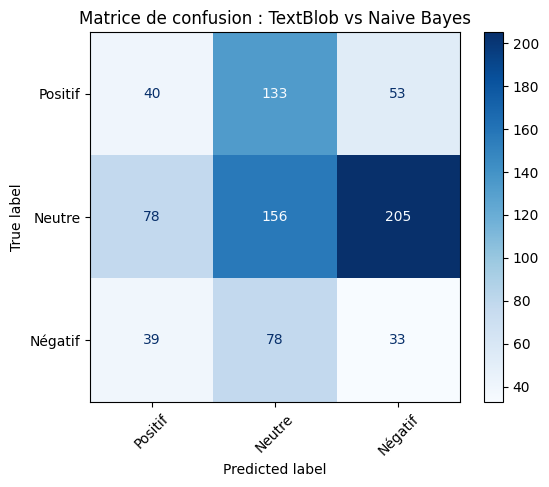

In [ ]:
#Matrice de confusion
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Vrais sentiments (TextBlob) vs prédictions (Naive Bayes)
y_true = df_comparaison["Sentiment"]
y_pred = df_comparaison["Sentiment_NaiveBayes"]

# Définir les étiquettes
labels = ["Positif", "Neutre", "Négatif"]

# Matrice de confusion
cm = confusion_matrix(y_true, y_pred, labels=labels)

# Affichage graphique
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap="Blues", xticks_rotation=45)
plt.title("Matrice de confusion : TextBlob vs Naive Bayes")
plt.show()


# Classification des types d’actions dans le texte de Pinocchio

## Logistic Regression

In [ ]:
import fitz
from sklearn.linear_model import LogisticRegression
exemples = [
    ("Pinocchio said he was sorry.", "parole"),
    ("Geppetto ran after him.", "action physique"),
    ("He felt very sad and cried.", "émotion"),
    ("The sun was shining above the hills.", "description"),
    ("The Fairy asked him why he lied.", "parole"),
    ("He jumped over the wall.", "action physique"),
    ("He was afraid of being punished.", "émotion"),
    ("There was a silence in the room.", "description")
]

X_entrainement_textes = [x[0] for x in exemples]
y_entrainement = [x[1] for x in exemples]

# Vectorisation des textes
vectorizer = TfidfVectorizer()
X_entrainement = vectorizer.fit_transform(X_entrainement_textes)

# Entraînement du modèle
modele = LogisticRegression()
modele.fit(X_entrainement, y_entrainement)

# Prédiction du type d’action sur l’ensemble du texte
X_complet = vectorizer.transform(phrases)
predictions = modele.predict(X_complet)

# Affichage des résultats
df_resultat = pd.DataFrame({
    "Phrase": phrases,
    "Type d'action": predictions
})

# Afficher les 10 premières lignes
print(df_resultat.head(10))

                                              Phrase    Type d'action
0  ﻿The Adventures of Pinocchio by Carlo Collodi ...          émotion
1            my little readers will say immediately.  action physique
2                    No, children, you are mistaken.  action physique
3        Once upon a time there was a piece of wood.      description
4             It was not an expensive piece of wood.          émotion
5                                       Far from it.  action physique
6  Just a common block of firewood, one of those ...          émotion
7  I do not know how this really happened, yet th...      description
8  His real name was Mastro Antonio, but everyone...          émotion
9  As soon as he saw that piece of wood, Mastro C...          émotion


In [ ]:
compte = Counter(predictions)
print("Répartition des types d'action :")
for action, nb in compte.items():
    print(f"{action.capitalize()} : {nb} phrases")

Répartition des types d'action :
Émotion : 900 phrases
Action physique : 1035 phrases
Description : 805 phrases
Parole : 518 phrases


Ce Résultat montre que Pinocchio est une œuvre très riche, où l’action physique et l’émotion sont au cœur de la narration. Le texte combine mouvement, profondeur émotionnelle, et description immersive, avec une dose équilibrée de dialogues pour faire progresser l’histoire.

# Analyse syntaxique : Détection de groupes nominaux

In [ ]:
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('averaged_perceptron_tagger_eng')
nltk.download('maxent_ne_chunker')
nltk.download('words')

from nltk import word_tokenize, pos_tag, RegexpParser, sent_tokenize

# Définir une grammaire pour repérer les groupes nominaux
grammaire = "NP: {<DT>?<JJ>*<NN|NNS|NNP|NNPS>+}"
analyseur = RegexpParser(grammaire)

# Exemple sur une phrase isolée
phrase_exemple = "The good fairy gave Pinocchio a piece of advice."
tokens_exemple = word_tokenize(phrase_exemple)
tags_exemple = pos_tag(tokens_exemple)
arbre_exemple = analyseur.parse(tags_exemple)

print("\nAnalyse syntaxique de la phrase exemple :")
arbre_exemple.pretty_print()

# Application sur tout le texte ----
phrases = sent_tokenize(raw)
groupes_nominaux = []

for phrase in phrases:
    tokens = word_tokenize(phrase)
    tags = pos_tag(tokens)
    arbre = analyseur.parse(tags)

    for sous_arbre in arbre.subtrees():
        if sous_arbre.label() == 'NP':
            groupe = " ".join(mot for mot, tag in sous_arbre.leaves())
            groupes_nominaux.append(groupe)

print("\nExemples de groupes nominaux extraits dans le texte :")
for g in groupes_nominaux[:20]:
    print("-", g)

print(f"\nNombre total de groupes nominaux détectés : {len(groupes_nominaux)}")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!



Analyse syntaxique de la phrase exemple :
                             S                                                      
    _________________________|_________________________________________________      
   |       |    |            NP                  NP            NP              NP   
   |       |    |     _______|_______            |         ____|_____          |     
gave/VBD of/IN ./. The/DT good/JJ fairy/NN Pinocchio/NNP a/DT     piece/NN advice/NN


Exemples de groupes nominaux extraits dans le texte :
- ﻿The Adventures
- Pinocchio
- Carlo Collodi CHAPTER
- Mastro Cherry
- carpenter
- a piece
- wood
- wept
- a child Centuries
- A king
- little readers
- children
- a time
- a piece
- wood
- an expensive piece
- wood
- a common block
- firewood
- solid logs

Nombre total de groupes nominaux détectés : 7681


L'analyse syntaxique du texte a permis d'identifier 7 681 groupes nominaux.
Parmi eux, on retrouve des noms de personnages (Pinocchio, Mastro Cherry), des objets importants (a piece, wood, firewood), ainsi que des expressions descriptives.
Ces groupes reflètent bien les éléments clés de l'histoire et peuvent servir de base à une analyse thématique ou sémantique plus poussée.

# QA

In [ ]:
import string
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from transformers import pipeline

nltk.download('punkt')
nltk.download('stopwords')

# Fonction de prétraitement du texte
stop_words = set(stopwords.words('english'))

def nettoyer_texte(text):
    text = text.lower()
    text = ''.join([c for c in text if c not in string.punctuation])
    tokens = word_tokenize(text)
    tokens = [w for w in tokens if w not in stop_words]
    return ' '.join(tokens)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# Fonction pour trouver la phrase la plus pertinente avec TF-IDF
def repondre_tfidf(question, corpus):
    corpus_nettoye = [nettoyer_texte(sent) for sent in corpus]
    question_nettoyee = nettoyer_texte(question)

    vect = TfidfVectorizer()
    matrice_tfidf = vect.fit_transform(corpus_nettoye + [question_nettoyee])

    vect_question = matrice_tfidf[-1]
    vect_docs = matrice_tfidf[:-1]

    similarites = cosine_similarity(vect_question, vect_docs)[0]
    meilleur_index = similarites.argmax()

    return corpus[meilleur_index], similarites[meilleur_index], meilleur_index


In [ ]:
# Fonction de réponse avec Hugging Face
modele_qa = pipeline("question-answering")

def repondre_huggingface(question, contexte):
    try:
        resultat = modele_qa(question=question, context=contexte)
        return resultat["answer"], resultat["score"]
    except:
        return "Je ne sais pas", 0.0


No model was supplied, defaulted to distilbert/distilbert-base-cased-distilled-squad and revision 564e9b5 (https://huggingface.co/distilbert/distilbert-base-cased-distilled-squad).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/473 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/261M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/436k [00:00<?, ?B/s]

Device set to use cpu


In [ ]:
# Exemple de question
question = "Qui est Geppetto ?"

# retrouver la phrase la plus proche
phrase_pertinente, score_tfidf, index_phrase = repondre_tfidf(question, phrases)

# créer un meilleur contexte si la phrase est trop courte
if len(phrase_pertinente.split()) < 8:
    contexte = " ".join(phrases[index_phrase:index_phrase + 3])
else:
    contexte = phrase_pertinente

# extraction de la réponse
reponse, score_hf = repondre_huggingface(question, contexte)

# Résultats
print("Méthode TF-IDF :")
print("→ Phrase la plus pertinente :", phrase_pertinente)
print("→ Similarité :", round(score_tfidf, 3))

print("\nModèle Hugging Face :")
print("→ Réponse extraite :", reponse)
print("→ Score de confiance :", round(score_hf, 3))

Méthode TF-IDF :
→ Phrase la plus pertinente : "Geppetto."
→ Similarité : 0.374

Modèle Hugging Face :
→ Réponse extraite : wood carver
→ Score de confiance : 0.748


La méthode TF-IDF a bien identifié une phrase contenant le mot-clé «Geppetto», mais cette phrase est trop courte («Geppetto.»), et ne fournit donc pas d'information claire sur le personnage. En revanche, le modèle Hugging Face a tout de même fourni une réponse correcte — «wood carver» (sculpteur sur bois) — avec un niveau de confiance assez élevé (0.748).

Cela montre que le modèle Transformer possède une capacité de compréhension sémantique supérieure, même lorsque le contexte en entrée est limité.

# Summary

## Résumé extractif avec CamemBERT

In [ ]:
# Résumé extractif avec CamemBERT
import numpy as np
import torch
from transformers import AutoTokenizer, AutoModel
from numpy.linalg import norm
# Chargement du tokenizer et du modèle CamemBERT
model_name = "camembert-base"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModel.from_pretrained(model_name)

# Fonction pour obtenir l'embedding d'une phrase
def get_sentence_embedding(phrase):
    inputs = tokenizer(phrase, return_tensors="pt", truncation=True, max_length=512)
    with torch.no_grad():
        outputs = model(**inputs)
    return outputs.last_hidden_state.mean(dim=1).squeeze().numpy()

# Embeddings des phrases
embeddings = [get_sentence_embedding(p) for p in phrases]
doc_embedding = np.mean(embeddings, axis=0)

# Fonction de similarité cosinus
def cosine_similarity(v1, v2):
    return np.dot(v1, v2) / (norm(v1) * norm(v2))

# Score de chaque phrase
scores = [cosine_similarity(e, doc_embedding) for e in embeddings]

# Sélection des meilleures phrases (top 30 %)
nb_phrases = max(1, int(0.3 * len(phrases)))
indices = np.argsort(scores)[-nb_phrases:]
indices = sorted(indices)

# Résumé final
resume = [phrases[i] for i in indices]

# Affichage
print("Résumé automatique avec CamemBERT :\n")
for ligne in resume:
    print("•", ligne)

tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/508 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/811k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.40M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/445M [00:00<?, ?B/s]

Résumé automatique avec CamemBERT :

• ﻿The Adventures of Pinocchio by Carlo Collodi CHAPTER 1 How it happened that Mastro Cherry, carpenter, found a piece of wood that wept and laughed like a child Centuries ago there lived-- "A king!"
• As soon as he saw that piece of wood, Mastro Cherry was filled with joy.
• Rubbing his hands together happily, he mumbled half to himself: "This has come in the nick of time.
• But as he was about to give it the first blow, he stood still with arm uplifted, for he had heard a wee, little voice say in a beseeching tone: "Please be careful!
• He turned frightened eyes about the room to find out where that wee, little voice had come from and he saw no one!
• He searched among the shavings--no one!
• He opened the door to look up and down the street--and still no one!
• "It can easily be seen that I only thought I heard the tiny voice say the words!
• As soon as he regained the use of his senses, he said, trembling and stuttering from fright: "Where did t

## Résumé automatique par chapitre avec BART

In [ ]:
# Séparer le texte en chapitres
chapters = re.split(r'CHAPTER \d+', raw)
chapter_titles = re.findall(r'CHAPTER \d+', raw)

# Associer chaque titre de chapitre avec son contenu
chapter_dicts = []
for title, content in zip(chapter_titles, chapters[1:]):  # skip the first empty split
    chapter_dicts.append({"title": title.strip(), "content": content.strip()})

In [ ]:
from transformers import BartTokenizer, BartForConditionalGeneration

# Chargement du modèle de résumé BART
tokenizer = BartTokenizer.from_pretrained("facebook/bart-large-cnn")
model = BartForConditionalGeneration.from_pretrained("facebook/bart-large-cnn")
# Fonction de résumé automatique
def summarize(text):
    inputs = tokenizer(text, return_tensors="pt", max_length=1024, truncation=True)
    summary_ids = model.generate(
        inputs["input_ids"],
        max_length=150,
        min_length=60,
        length_penalty=2.0,
        num_beams=4,
        early_stopping=True
    )
    return tokenizer.decode(summary_ids[0], skip_special_tokens=True)

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.58k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

In [ ]:
for i, chapter in enumerate(chapter_dicts):
    print(f"{chapter['title']}")
    summary = summarize(chapter['content'])
    print(f"Summary:\n{summary}\n")

CHAPTER 1
Summary:
Mastro Cherry, carpenter, found a piece of wood that wept and laughed like a child. His real name was MastroAntonio, but everyone called him Mastro Cherry for the tip of his nose was so round and red and shiny that it looked like a ripe cherry.

CHAPTER 2
Summary:
Mastro Cherry gives a piece of wood to his friend, Geppetto, who takes it to make himself a Marionette that will dance, encompass, and turn somersaults. The two men fight over the wood, but settle their accounts and say they will be friends for the rest of their lives.

CHAPTER 3
Summary:
As soon as he gets home, Geppetto fashions the Marionette and calls it Pinocchio. The first pranks of the Marionettes include pulling wigs on him and kicking him in the face. The Marionette's legs were so stiff that he could not move them, but he still ran all around the street.

CHAPTER 4
Summary:
The story of Pinocchio and the Talking Cricket is a classic tale of mischievous children. In the story, a boy is chased by a c

## Interface simple avec Gradio

In [ ]:
pip install gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.9/46.9 MB 16.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.2/322.2 kB 19.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.4/11.4 MB 67.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.4/62.4 kB 4.3 MB/s eta 0:00:00


In [ ]:
import gradio as gr
from transformers import pipeline

# 1. Pipelines
qa_pipeline = pipeline("question-answering")
summarizer = pipeline("summarization", model="facebook/bart-large-cnn")
translator = pipeline("translation_en_to_fr", model="Helsinki-NLP/opus-mt-en-fr")
sentiment_pipeline = pipeline("sentiment-analysis")

# 2. Fonctions
def poser_question(question):
    contexte = raw[:1500]  # ou résume le texte ou utilise des phrases pertinentes
    reponse = qa_pipeline(question=question, context=contexte)
    return reponse["answer"]

def resumer_texte(input_text):
    resume = summarizer(input_text, max_length=130, min_length=30, do_sample=False)
    return resume[0]["summary_text"]

def analyser_sentiment(phrase):
    resultat = sentiment_pipeline(phrase)[0]
    return f"{resultat['label']} (score: {round(resultat['score'], 2)})"

def traduire_en_fr(phrase):
    trad = translator(phrase)
    return trad[0]['translation_text']

# 3. Interface Gradio
demo = gr.Interface(
    fn=poser_question,
    inputs=gr.Textbox(label="Pose une question sur Pinocchio"),
    outputs=gr.Textbox(label="Réponse"),
    title="Pinocchio QA - Gradio",
    description="Pose une question sur le conte, obtiens une réponse !"
)

demo2 = gr.Interface(fn=resumer_texte, inputs="text", outputs="text", title="Résumé de texte")
demo3 = gr.Interface(fn=analyser_sentiment, inputs="text", outputs="text", title="Analyse de sentiment")
demo4 = gr.Interface(fn=traduire_en_fr, inputs="text", outputs="text", title="Traduction anglais → français")

# 4. Regrouper tout dans un onglet
gr.TabbedInterface(
    [demo, demo2, demo3, demo4],
    ["QA", "Résumé", "Sentiment", "Traduction"]
).launch()


No model was supplied, defaulted to distilbert/distilbert-base-cased-distilled-squad and revision 564e9b5 (https://huggingface.co/distilbert/distilbert-base-cased-distilled-squad).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cpu
Device set to use cpu
/usr/local/lib/python3.11/dist-packages/transformers/models/marian/tokenization_marian.py:175: UserWarning: Recommended: pip install sacremoses.
  warnings.warn("Recommended: pip install sacremoses.")
Device set to use cpu
No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

Device set to use cpu


Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://646edd1994165c42a2.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


Les résultats montrent que **Pinocchio** est un récit riche, mêlant émotion, action et dialogues, centré sur des thématiques de transformation, d'éducation et de relation père-fils.

Nous avons aussi comparé plusieurs approches de sentiment et résumé, ce qui met en évidence les forces des modèles modernes de type Transformer.

Ce travail nous a permis d'explorer une grande variété d'outils NLP et d'en comprendre les apports dans l'analyse littéraire automatisée.